In [166]:
print("Hypothesis:\n\n")
print('How people are reacting working from home in California:')

Hypothesis:


How people are reacting working from home in California:


In [167]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
import pandas as pd
import matplotlib.pyplot as plt
from apscheduler.schedulers.blocking import BlockingScheduler
from textblob import TextBlob

In [168]:
access_token = "Enter Your Key"
access_token_secret = "Enter Your Key"
consumer_key = "Enter Your Key"
consumer_secret = "Enter Your Key"
var = tweepy.OAuthHandler(consumer_key, consumer_secret)
var.set_access_token(access_token, access_token_secret)
api = tweepy.API(var,wait_on_rate_limit=True)

In [169]:
print("Figuring out the sentiments of people about working from home. Using textBlob for finding if tweets about working from home are positive or negative. For this I am calculating total number of tweets collected and tweets which are showing positive and negative sentiments and removing all the neutral values.")

Figuring out the sentiments of people about working from home. Using textBlob for finding if tweets about working from home are positive or negative. For this I am calculating total number of tweets collected and tweets which are showing positive and negative sentiments and removing all the neutral values.


In [ ]:
total_tweet = []
cnt_sentiment_cal = []

count1 = 0

try :

    query = ['Wfh -filter:retweets']
    max_tweets = 4526

    print("Fetching data from api For California")
    tweets = tweepy.Cursor(api.search,q=query,language='en',geocode = "31.578871,74.305184,5000mi").items(max_tweets)
    print("Data fetched")

    print("Begning to parse data for sentiment analysis")
    for tweet in tweets:   
   
            total_tweet.append({"text":tweet.text,"created_at":tweet.created_at.strftime("%x")})
            count1=count1+1
    
            if(count1 % 10 == 0):
                print(str((count1/max_tweets)*100)+"% done" )
   
                analysis = TextBlob(tweet.text)
            if analysis.sentiment[0]>0:
                cnt_sentiment_cal.append({"text":tweet.text,"Sentiment":"positive","created_at":tweet.created_at.strftime("%m-%d")})
        
            elif analysis.sentiment[0]< 0:
                 cnt_sentiment_cal.append({"text":tweet.text,"Sentiment":"negative","created_at":tweet.created_at.strftime("%m-%d")})

except:
    print("Error in fetching data")

finally:
    print("Completing process")

Fetching data from api For California
Data fetched
Begning to parse data for sentiment analysis
0.22094564737074682% done
0.44189129474149363% done
0.6628369421122404% done
0.8837825894829873% done
1.104728236853734% done
1.3256738842244808% done
1.5466195315952276% done
1.7675651789659745% done
1.9885108263367213% done
2.209456473707468% done
2.4304021210782145% done
2.6513477684489617% done
2.8722934158197084% done
3.093239063190455% done
3.314184710561202% done
3.535130357931949% done
3.756076005302696% done
3.9770216526734425% done
4.197967300044189% done
4.418912947414936% done
4.639858594785682% done
4.860804242156429% done
5.081749889527176% done
5.302695536897923% done
5.52364118426867% done
5.744586831639417% done
5.965532479010164% done
6.18647812638091% done
6.407423773751657% done
6.628369421122404% done
6.8493150684931505% done
7.070260715863898% done
7.291206363234644% done
7.512152010605392% done
7.7330976579761375% done
7.954043305346885% done
8.17498895271763% done
8.3

In [187]:
print("Total number of tweets working from home in California: "+ str(count1))
print("Total number of sentiment tweets which are negative and positive :"+ str(len(cnt_sentiment_cal)))

Total number of tweets working from home in California: 4526
Total number of sentiment tweets which are negative and positive :2380


In [205]:
print('Using pandas to clean the tweets collected and to create data frame. ')

Using pandas to clean the tweets collected and to create data frame. 


In [206]:
data_pd=pd.DataFrame(cnt_sentiment_cal)
data_pd=data_pd[["text", "Sentiment","created_at"]]
data_pd.head(5)

,text,Sentiment,created_at
0,RT @tseenster: Would particularly welcome coll...,positive,04-27
1,Beating WFH burnout https://t.co/wJXKwvepfZ,positive,04-27
2,RT @tseenster: #WFH tweetchat starting in abou...,positive,04-27
3,"#WFH tweetchat starting in about 25 mins, peep...",positive,04-27
4,"@Diff_View @greatbong Yes, WFH will evolve. It...",positive,04-27


In [207]:
data_pd.to_csv("tweet_data.csv") #Storing data to csv

In [208]:
data_pd = pd.read_csv("tweet_data.csv") #Read file
data_pd.head(10) #Reading data from csv

,Unnamed: 0,text,Sentiment,created_at
0,0,RT @tseenster: Would particularly welcome coll...,positive,04-27
1,1,Beating WFH burnout https://t.co/wJXKwvepfZ,positive,04-27
2,2,RT @tseenster: #WFH tweetchat starting in abou...,positive,04-27
3,3,"#WFH tweetchat starting in about 25 mins, peep...",positive,04-27
4,4,"@Diff_View @greatbong Yes, WFH will evolve. It...",positive,04-27
5,5,Jurassic Park Star Reveals the One Thing You N...,positive,04-27
6,6,RT @DynamicCIO: Work from home tips from the e...,positive,04-27
7,7,RT @RamendraVerma1: With WFH becoming a new no...,positive,04-27
8,8,RT @tseenster: Would particularly welcome coll...,positive,04-27
9,9,"With WFH becoming a new normal, companies can ...",positive,04-27


In [209]:
print('Total number of positive tweets and total number of negative tweets from the sentiment data in csv.')
sentiment_data=cnt_sentiment_cal
grouped_data = pd.DataFrame(data_pd.groupby(["Sentiment"])["created_at"].count()).reset_index()
grouped_data.rename(columns = {'created_at': 'Count'}, inplace = True)
grouped_data.head()

Total number of positive tweets and total number of negative tweets from the sentiment data in csv.


,Sentiment,Count
0,negative,490
1,positive,1890


Bar graph to show positive and negative tweets collected in California to record the sentiment of people who are either happy  or sad about working from home


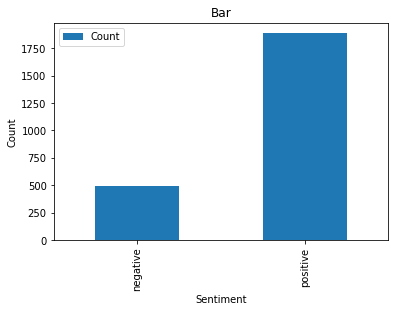

In [210]:
print("Bar graph to show positive and negative tweets collected in California to record the sentiment of people who are either happy  or sad about working from home")
#Filter the DataFrame down only to those columns to chart
bar_plot_data = grouped_data[["Sentiment","Count"]]
bar_plot_data = bar_plot_data.set_index("Sentiment")

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot_data.plot(kind="bar")
plt.title("Bar")
plt.ylabel("Count")
plt.xlabel("Sentiment")

plt.savefig("Bar_Count_Positive_Negative_WFH.png")
plt.show()

Pie chart to show positive and negative tweets about working from home in California: 
 

Percentage of Negative tweets: 20.58823529411765 %
Percentage of Positive tweets: 79.41176470588235 %

 
Pie Chart :


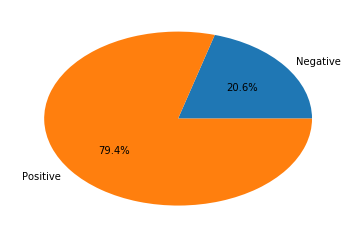

In [211]:
print('Pie chart to show positive and negative tweets about working from home in California: \n \n')
sentiment_count = (data_pd.groupby(["Sentiment"])["created_at"].count()).tolist()
labels = ["Negative", "Positive"]
colors = [ "blue","orange"]
plt.pie(sentiment_count,autopct="%1.1f%%",labels=labels)

labels = ['Orange - positive', 'Blue negative']


positive_percent=(sentiment_count[0]*100)/(sentiment_count[0]+sentiment_count[1])

print("Percentage of Negative tweets: "+ str(positive_percent) +" %")
print("Percentage of Positive tweets: "+str((sentiment_count[1]*100)/(sentiment_count[0]+sentiment_count[1]))+(" %"))
print("\n \nPie Chart :")
plt.savefig("PieChart_Positive_Negative_WFH.png")

In [212]:
print("Analysis 1: To show how people are positive or negative working from home \n")
print('More people are positive about working from home in California. Pie graph and Bar graph shows how. ')

Analysis 1: To show how people are positive or negative working from home 

More people are positive about working from home in California. Pie graph and Bar graph shows how. 


In [213]:
print("Total number of people positive and negative working from home based on dates.\n \n")
twitter_date = pd.DataFrame(data_pd.groupby(["created_at","Sentiment"]).count()).reset_index()
twitter_date.rename(columns = {'text': 'Count'}, inplace = True)
twitter_date.sort_values(by=['created_at'])

twitter_date.head()

Total number of people positive and negative working from home based on dates.
 



,created_at,Sentiment,Unnamed: 0,Count
0,04-19,negative,12,12
1,04-19,positive,30,30
2,04-20,negative,108,108
3,04-20,positive,221,221
4,04-21,negative,50,50


In [214]:
print("Using group by to seprate positive and negative people about working from home based on dates:")
df1, df2 = [a for _, a in twitter_date.groupby(twitter_date['Sentiment'] != 'negative')]
df1.reset_index()
df1.head()


Using group by to seprate positive and negative people about working from home based on dates:


,created_at,Sentiment,Unnamed: 0,Count
0,04-19,negative,12,12
2,04-20,negative,108,108
4,04-21,negative,50,50
6,04-22,negative,100,100
8,04-23,negative,20,20


In [215]:
df2.head()

,created_at,Sentiment,Unnamed: 0,Count
1,04-19,positive,30,30
3,04-20,positive,221,221
5,04-21,positive,439,439
7,04-22,positive,235,235
9,04-23,positive,345,345


In [216]:
total_data_pd=pd.DataFrame(total_tweet)
total_data_pd=data_pd[["text","created_at"]]
total_data_pd.head(10)
total_tweet_df = pd.DataFrame(total_data_pd.groupby(["created_at"]).count()).reset_index()
total_tweet_df.rename(columns = {'text': 'Count'}, inplace = True)
total_tweet_df.sort_values(by=['created_at'])

total_tweet_df.head()


,created_at,Count
0,04-19,42
1,04-20,329
2,04-21,489
3,04-22,335
4,04-23,365


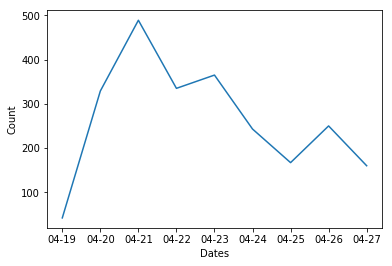

In [217]:
import numpy as np
y=total_tweet_df['Count'].tolist()
x = total_tweet_df['created_at'].tolist()
plt.ylabel("Count")
plt.xlabel("Dates")
plt.plot(x,y)
plt.show()


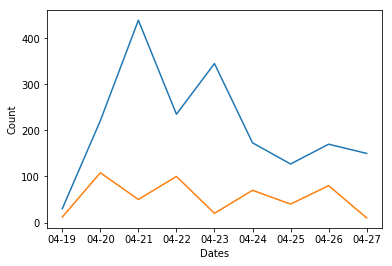

In [218]:
y2=df1['Count'].tolist()
y1=df2['Count'].tolist()
x = df1['created_at'].tolist()

# multiple line plot
plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel("Count")
plt.xlabel("Dates")
plt.savefig("Flow_basedondates_Positive_Negative_WFH.png")

In [219]:
print('Analysis 2:\n \n')
print("People are more positive working from based on tweets collected on differnt dates. Blue line shows positive comments people \nhave for working from home and Orange shows negative tweets.")


Analysis 2:
 

People are more positive working from based on tweets collected on differnt dates. Blue line shows positive comments people 
have for working from home and Orange shows negative tweets.
